# Comparing 2 group of performance measurements

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu

## Tip! 

If you wan't to do performance measurements in C# then have a look at [BenchmarkDotNet](https://benchmarkdotnet.org/index.html).

Let's say we have 2 groups of performance measurements - each with 25 observations

In [2]:
perfMeasurement1 = np.array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18, 20, 17, 31, 20, 25, 28, 21, 27])
perfMeasurement2 = np.array([21, 22, 15, 12, 21, 21, 19, 26, 22, 24, 17, 23, 19, 22, 20, 24, 18, 13, 29, 21, 19, 14, 23, 17, 20])

In [5]:
data = pd.DataFrame(
    {"perfMeasurement1": perfMeasurement1, "perfMeasurement2": perfMeasurement2}
)

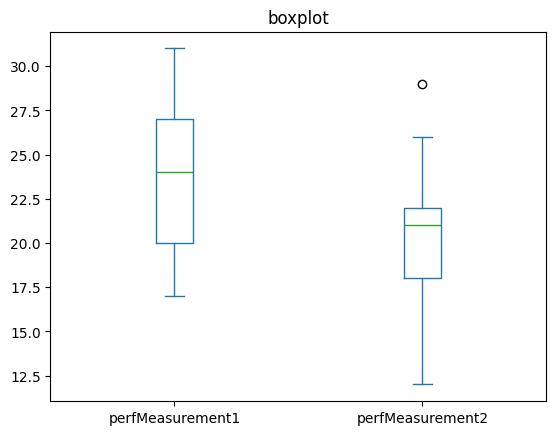

In [10]:
data.plot(kind="box", title="boxplot");

## Statistical test

### Student's t-test

- Prerequisites for using test
- Calculate test statistic (using some formula and find determine degrees of freedom)
- P-value
- Null hypothesis
- Significant


In [62]:
mean = data.mean()
mean

perfMeasurement1    23.60
perfMeasurement2    20.08
dtype: float64

In [63]:
mean = mean.iloc[0] - mean.iloc[1]
mean

3.520000000000003

In [12]:
allPerfMeasurements = np.concatenate((perfMeasurement1, perfMeasurement2))

In [14]:
n_halfPerfMeasurements = len(allPerfMeasurements) / 2

In [66]:
simulated_means = []
samples = 100000

In [68]:
for i in range(0, samples):
    np.random.shuffle(allPerfMeasurements)

    simulated_means.append(
        np.mean(allPerfMeasurements[:n_halfPerfMeasurements])
        - np.mean(allPerfMeasurements[n_halfPerfMeasurements:])
    )

In [69]:
two_std = 2 * np.std(simulated_means, ddof=1)

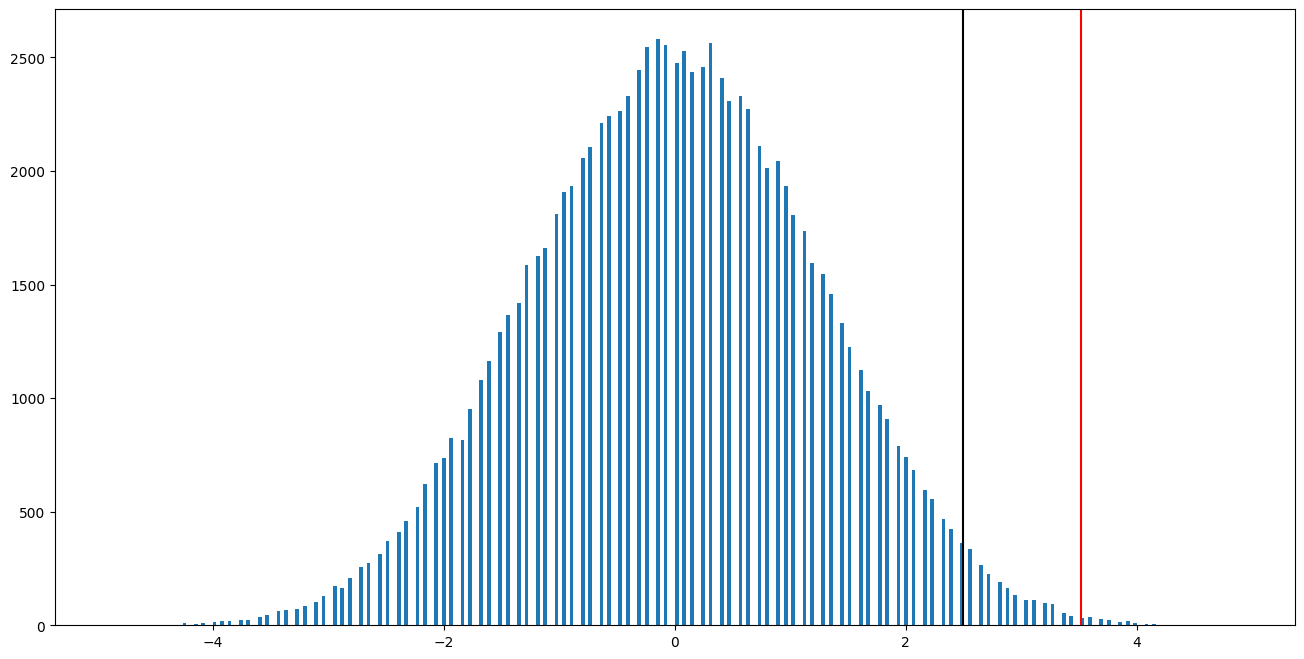

In [70]:
plt.figure(1, figsize=(16, 8))
plt.hist(simulated_means, bins=300)
_ = plt.axvline(x=mean, ymax=1, linewidth=1.5, color="red")
_ = plt.axvline(x=two_std, ymax=1, linewidth=1.5, color="black")

In [71]:
len(np.where(simulated_means >= mean)[0])

188

In [73]:
obs = len(np.where(simulated_means >= mean)[0]) / samples
obs

0.00188

We are on solid ground. This approach is not just something I came up with. More generally this is a type of statistics called non-parametric statistics which is characterized by having a minimum of requirements for using it.

In particular the above approach is known as Mann Whitney U-test!


In [74]:
alpha = 0.05
stat, p = mannwhitneyu(perfMeasurement1, perfMeasurement2)
print("Statistics=%.3f, p=%.3f" % (stat, p))

# interpret
if p > alpha:
    print("Same distribution (fail to reject H0)")
else:
    print("Different distribution (reject H0)")

Statistics=441.500, p=0.012
Different distribution (reject H0)
